**STEP 1**: The installation, importation and upgrade of the needed libraries. This is important as there would be no code without these.

In [1]:
!pip install numpy pandas yfinance matplotlib

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

**STEP 2**: The creation of an interface that allows for the input of the ticker symbol of the first equity for the correlation, start date of data collection and end date of data collection. The interface should address the ease of changeability

In [11]:
stock1_ticker = "AAPL"
stock1_start_date = "2020-01-01"
stock1_end_date = "2024-11-22"

stock1_data = yf.download(stock1_ticker, stock1_start_date, stock1_end_date)
print(stock1_data)

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2020-01-02 00:00:00+00:00   72.796021   75.087502   75.150002   73.797501   
2020-01-03 00:00:00+00:00   72.088287   74.357498   75.144997   74.125000   
2020-01-06 00:00:00+00:00   72.662720   74.949997   74.989998   73.187500   
2020-01-07 00:00:00+00:00   72.320992   74.597504   75.224998   74.370003   
2020-01-08 00:00:00+00:00   73.484344   75.797501   76.110001   74.290001   
...                               ...         ...         ...         ...   
2024-11-15 00:00:00+00:00  225.000000  225.000000  226.919998  224.270004   
2024-11-18 00:00:00+00:00  228.020004  228.020004  229.740005  225.169998   
2024-11-19 00:00:00+00:00  228.279999  228.279999  230.160004  226.660004   
2024-11-20 00:00:00+00:00  229.000000  229.000000  229.929993  225.889999   

**STEP 3**: The creation of an interface that allows for the input of the ticker symbol of the second equity for the correlation check, start date of data collection and end date of data collection. The interface should address the ease of changeability

In [12]:
stock2_ticker = "NVDA"
stock2_start_date = "2020-01-01"
stock2_end_date = "2024-11-22"

stock2_data = yf.download(stock2_ticker, stock2_start_date, stock2_end_date)
print(stock2_data)

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           NVDA        NVDA        NVDA        NVDA   
Date                                                                        
2020-01-02 00:00:00+00:00    5.973123    5.997750    5.997750    5.918000   
2020-01-03 00:00:00+00:00    5.877516    5.901750    5.945750    5.852500   
2020-01-06 00:00:00+00:00    5.902164    5.926500    5.931750    5.781750   
2020-01-07 00:00:00+00:00    5.973620    5.998250    6.044250    5.909750   
2020-01-08 00:00:00+00:00    5.984824    6.009500    6.051000    5.953750   
...                               ...         ...         ...         ...   
2024-11-15 00:00:00+00:00  141.979996  141.979996  145.240005  140.080002   
2024-11-18 00:00:00+00:00  140.149994  140.149994  141.550003  137.149994   
2024-11-19 00:00:00+00:00  147.009995  147.009995  147.130005  140.990005   
2024-11-20 00:00:00+00:00  145.889999  145.889999  147.559998  142.729996   

**STEP 4**: Dropping of the columns that are not needed in the first equity data and the second equity data for this project. The needed columns for this project are DATE and ADJUSTED CLOSE

In [13]:
stock1_data = stock1_data.drop(columns=['Close', 'Open', 'High', 'Low', 'Volume'])
stock2_data = stock2_data.drop(columns=['Close', 'Open', 'High', 'Low', 'Volume'])

print(stock1_data)
print(stock2_data)

Price                       Adj Close
Ticker                           AAPL
Date                                 
2020-01-02 00:00:00+00:00   72.796021
2020-01-03 00:00:00+00:00   72.088287
2020-01-06 00:00:00+00:00   72.662720
2020-01-07 00:00:00+00:00   72.320992
2020-01-08 00:00:00+00:00   73.484344
...                               ...
2024-11-15 00:00:00+00:00  225.000000
2024-11-18 00:00:00+00:00  228.020004
2024-11-19 00:00:00+00:00  228.279999
2024-11-20 00:00:00+00:00  229.000000
2024-11-21 00:00:00+00:00  228.520004

[1232 rows x 1 columns]
Price                       Adj Close
Ticker                           NVDA
Date                                 
2020-01-02 00:00:00+00:00    5.973123
2020-01-03 00:00:00+00:00    5.877516
2020-01-06 00:00:00+00:00    5.902164
2020-01-07 00:00:00+00:00    5.973620
2020-01-08 00:00:00+00:00    5.984824
...                               ...
2024-11-15 00:00:00+00:00  141.979996
2024-11-18 00:00:00+00:00  140.149994
2024-11-19 00:00:00+00:00

**STEP 5**: The computation of the rolling correlation. A lower rolling window (30)is more sensitive to short-term changes while a higher rolling window (60) is less sensitive and captures longer-term trends.

In [14]:
stock1_data['return_stock1'] = stock1_data['Adj Close'].pct_change()
stock2_data['return_stock2'] = stock2_data['Adj Close'].pct_change()

rolling_corr = stock1_data['return_stock1'].rolling(window=30).corr(stock2_data['return_stock2'])

**STEP 6**: Plotting the chart

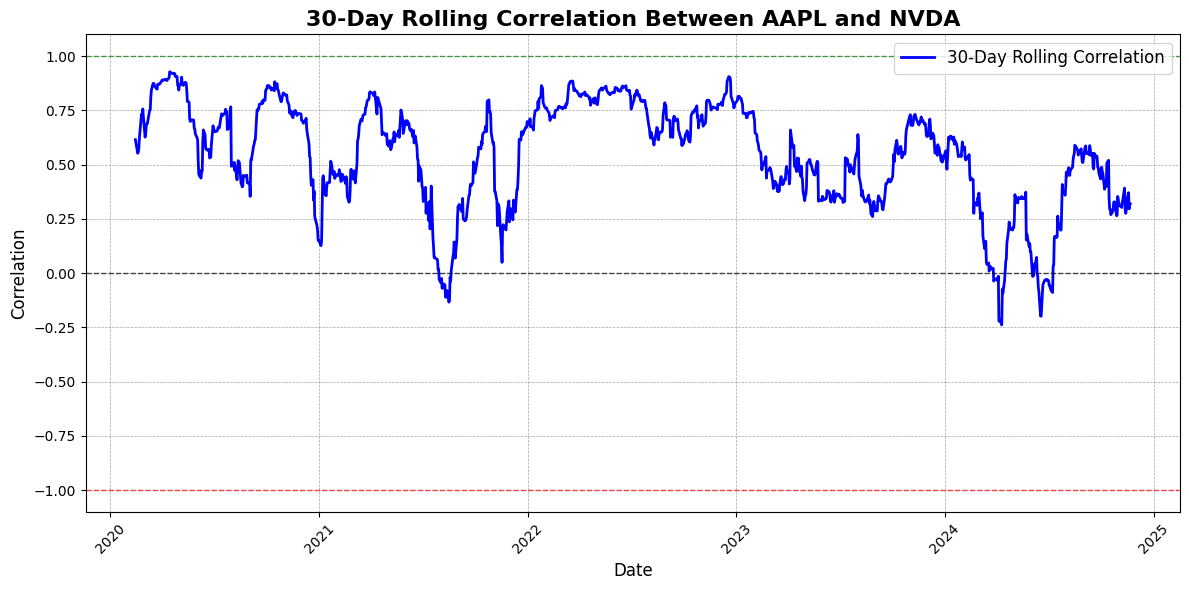

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(rolling_corr, color='blue', linewidth=2, label='30-Day Rolling Correlation')

plt.title(f"30-Day Rolling Correlation Between {stock1_ticker} and {stock2_ticker}", fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.legend(fontsize=12)

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.axhline(0, color='black', linewidth=1, linestyle='--', alpha=0.7)
plt.axhline(1, color='green', linewidth=1, linestyle='--', alpha=0.7)
plt.axhline(-1, color='red', linewidth=1, linestyle='--', alpha=0.7)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()